In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import proportion
sns.set_style('ticks')

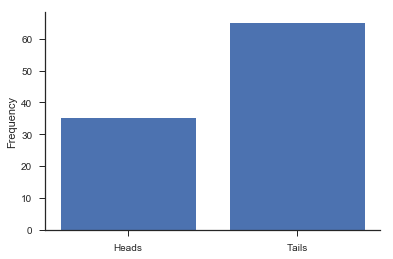

In [58]:
p = 0.45 # probability for head
n = 100
heads = (np.random.random(n) < p).sum()

fig, ax = plt.subplots()
ax.bar([0, 1], [heads, n-heads])
ax.set_xticks((0,1))
ax.set_xticklabels(('Heads', 'Tails'))
ax.set_ylabel('Frequency')
sns.despine()

http://statsmodels.sourceforge.net/devel/stats.html

In [59]:
print("P-value for two-sided biomial test for a fair coin: {:.2g}".format(
    proportion.binom_test(heads, n, prop=0.5)
))


P-value for two-sided biomial test for a fair coin: 0.0035


In [60]:
min_heads, max_heads = proportion.binom_test_reject_interval(0.5, n, alpha=0.05)
min_heads, max_heads, heads

(39.0, 61.0, 35)

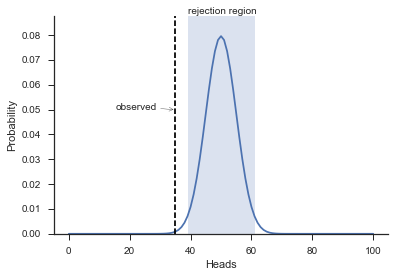

In [82]:
rv = stats.binom(n, 0.5)
max_freq = rv.pmf(n//2)
fig, ax = plt.subplots()
ax.fill_between([min_heads, max_heads], [max_freq*1.1]*2, alpha=0.2)
ax.plot(rv.pmf(np.arange(0, n+1)))
ax.axvline(heads, color='k', ls='--')
ax.annotate('rejection region', (0.4, 1.01), xycoords='axes fraction')
ax.annotate('observed', 
            (heads, 0.05), xytext=(-60, 0), 
            xycoords='data', textcoords='offset points',
            arrowprops=dict(arrowstyle='->')
)
ax.set(
    ylim=(0, max_freq*1.1),
    xlabel='Heads',
    ylabel='Probability'
)
sns.despine()